# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


In [3]:
cities

['bandar lampung',
 "st. john's",
 'waitangi',
 'avarua',
 'edinburgh of the seven seas',
 'grytviken',
 'adamstown',
 'rikaze',
 'nyurba',
 'marvejols',
 'grand falls-windsor',
 'port-aux-francais',
 'puerto ayora',
 'tazovsky',
 'sumbawa besar',
 'tiksi',
 'ushuaia',
 'vorgashor',
 'constantia',
 'port augusta',
 'qaqortoq',
 'zahedan',
 'talnakh',
 'puerto natales',
 'ba',
 'katsuura',
 'san patricio',
 'bredasdorp',
 'dudinka',
 'vilyuchinsk',
 'kangding',
 'yellowknife',
 'port lincoln',
 "ivdel'",
 'college',
 'nuuk',
 'ovalle',
 'eyl',
 'biloli',
 'nemuro',
 'bethel',
 'ust-nera',
 'georgetown',
 'villa tecolutilla',
 'pitimbu',
 'celestun',
 'weno',
 'hermanus',
 'zheleznodorozhnyy',
 'laguna',
 'santa ana de yacuma',
 'east honolulu',
 'liupanshui',
 'castellarano',
 'bayji',
 'kendari',
 'ugoofaaru',
 'stanley',
 'oeiras do para',
 'longyearbyen',
 'albany',
 'iqaluit',
 'novo aripuana',
 'kone',
 'blackmans bay',
 'barranca',
 'luderitz',
 'ben gardane',
 'margaret river',
 

In [4]:
lats

array([ -5.82512157,  40.13906183, -48.40968189, ...,  20.30954063,
         7.23245657, -17.13984058])

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds =  city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bandar lampung
Processing Record 2 of Set 1 | st. john's
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | rikaze
Processing Record 9 of Set 1 | nyurba
Processing Record 10 of Set 1 | marvejols
Processing Record 11 of Set 1 | grand falls-windsor
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | sumbawa besar
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | constantia
Processing Record 20 of Set 1 | port augusta
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | lyozna
Processing Record 39 of Set 4 | port-cartier
Processing Record 40 of Set 4 | antofagasta
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | bugul'ma
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | mchinji
Processing Record 47 of Set 4 | khorugh
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | minas de marcona
Processing Record 0 of Set 5 | el granada
Processing Record 1 of Set 5 | sisimiut
Processing Record 2 of Set 5 | kursk
Processing Record 3 of Set 5 | rongelap
Processing Record 4 of Set 5 | liwale
Processing Record 5 of Set 5 | hassi messaoud
Processing Record 6 of Set 5 | las vegas
Processing Record 7 of Set 5 | quellon
Processing Record 8 of Set 5 | weining
Processing Record 9 of Set 5 | general jose de san martin
Processing Record 10 of Set 5 | saint-francois
Processing Record 11 of

Processing Record 32 of Set 8 | matale
Processing Record 33 of Set 8 | thunder bay
Processing Record 34 of Set 8 | hood river
Processing Record 35 of Set 8 | portland
Processing Record 36 of Set 8 | springbok
Processing Record 37 of Set 8 | talodi
Processing Record 38 of Set 8 | badagry
Processing Record 39 of Set 8 | hami
Processing Record 40 of Set 8 | celldomolk
Processing Record 41 of Set 8 | sao joao evangelista
Processing Record 42 of Set 8 | nadi
Processing Record 43 of Set 8 | dunedin
Processing Record 44 of Set 8 | launceston
Processing Record 45 of Set 8 | thinadhoo
Processing Record 46 of Set 8 | coahuayana de hidalgo
Processing Record 47 of Set 8 | tralee
Processing Record 48 of Set 8 | deuchendorf
Processing Record 49 of Set 8 | antalaha
Processing Record 0 of Set 9 | suntar
Processing Record 1 of Set 9 | dongxi
Processing Record 2 of Set 9 | ulaangom
Processing Record 3 of Set 9 | basco
Processing Record 4 of Set 9 | tshabong
Processing Record 5 of Set 9 | wadesboro
Proce

Processing Record 17 of Set 12 | newport
Processing Record 18 of Set 12 | fortuna
Processing Record 19 of Set 12 | betio village
Processing Record 20 of Set 12 | kourou
Processing Record 21 of Set 12 | ulanhot
Processing Record 22 of Set 12 | margate
Processing Record 23 of Set 12 | malvan
Processing Record 24 of Set 12 | broken hill
Processing Record 25 of Set 12 | mumbwa
Processing Record 26 of Set 12 | lindsay
Processing Record 27 of Set 12 | ola
Processing Record 28 of Set 12 | san rafael del yuma
Processing Record 29 of Set 12 | vorkuta
Processing Record 30 of Set 12 | masterton
Processing Record 31 of Set 12 | shilka
Processing Record 32 of Set 12 | ntossoni
City not found. Skipping...
Processing Record 33 of Set 12 | papao
Processing Record 34 of Set 12 | micheweni
Processing Record 35 of Set 12 | potosi
Processing Record 36 of Set 12 | sol'-iletsk
Processing Record 37 of Set 12 | tromso
Processing Record 38 of Set 12 | torghay
Processing Record 39 of Set 12 | jolo
Processing Re

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bandar lampung,-5.4254,105.2580,29.86,64,65,4.33,ID,1730110203
1,st. john's,47.5649,-52.7093,3.32,91,22,1.34,CA,1730109877
2,waitangi,-43.9535,-176.5597,11.57,95,0,2.68,NZ,1730109784
3,avarua,-21.2078,-159.7750,22.03,73,20,2.57,CK,1730109735
4,edinburgh of the seven seas,-37.0676,-12.3116,14.97,86,96,10.79,SH,1730109816


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bandar lampung,-5.4254,105.2580,29.86,64,65,4.33,ID,1730110203
1,st. john's,47.5649,-52.7093,3.32,91,22,1.34,CA,1730109877
2,waitangi,-43.9535,-176.5597,11.57,95,0,2.68,NZ,1730109784
3,avarua,-21.2078,-159.7750,22.03,73,20,2.57,CK,1730109735
4,edinburgh of the seven seas,-37.0676,-12.3116,14.97,86,96,10.79,SH,1730109816


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

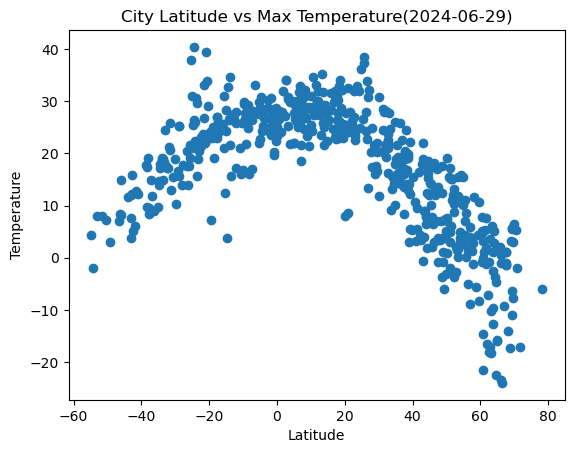

In [13]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"City Latitude vs Max Temperature(2024-06-29)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

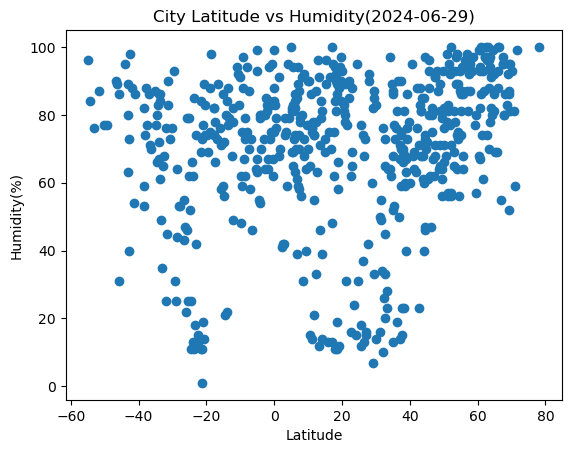

In [14]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f"City Latitude vs Humidity(2024-06-29)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

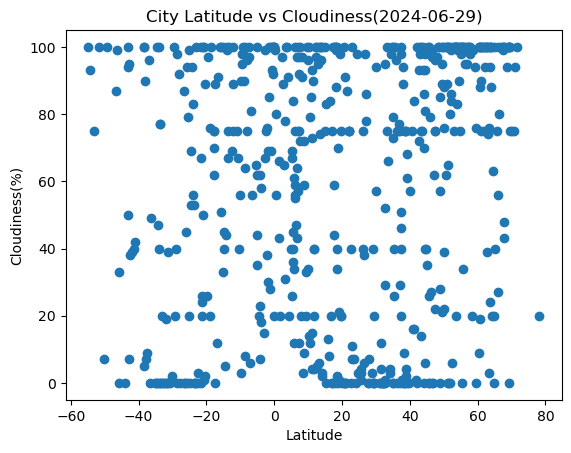

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"City Latitude vs Cloudiness(2024-06-29)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

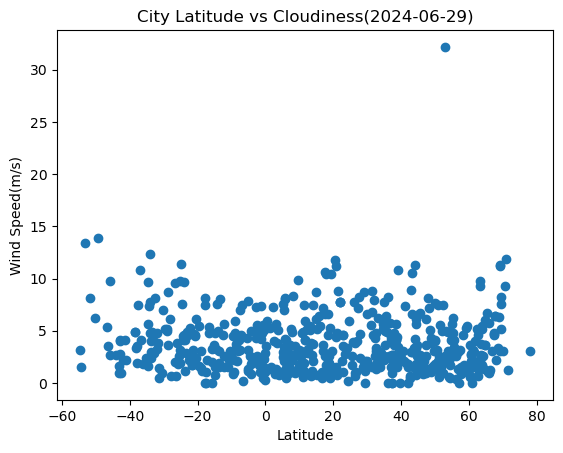

In [16]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title(f"City Latitude vs Cloudiness(2024-06-29)")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    
# Get regression values
 regress_values = x_values * slope + intercept

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,st. john's,47.5649,-52.7093,3.32,91,22,1.34,CA,1730109877
7,rikaze,29.2500,88.8833,17.52,7,0,2.00,CN,1730110212
8,nyurba,63.2842,118.3319,-10.17,96,100,2.19,RU,1730110218
9,marvejols,44.5538,3.2914,16.85,73,40,1.79,FR,1730110220
10,grand falls-windsor,48.9332,-55.6649,-0.83,89,28,4.31,CA,1730109608


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bandar lampung,-5.4254,105.2580,29.86,64,65,4.33,ID,1730110203
2,waitangi,-43.9535,-176.5597,11.57,95,0,2.68,NZ,1730109784
3,avarua,-21.2078,-159.7750,22.03,73,20,2.57,CK,1730109735
4,edinburgh of the seven seas,-37.0676,-12.3116,14.97,86,96,10.79,SH,1730109816
5,grytviken,-54.2811,-36.5092,-1.93,84,93,1.50,GS,1730109817


###  Temperature vs. Latitude Linear Regression Plot

City_ID
1       8.350411
7      18.653778
8      -0.492755
9      10.044358
10      7.580650
         ...    
560    -4.073722
561     7.186459
562    31.705342
564    24.213800
565    31.041063
Name: Lat, Length: 391, dtype: float64
The r^2-value is: 0.7465965484769336


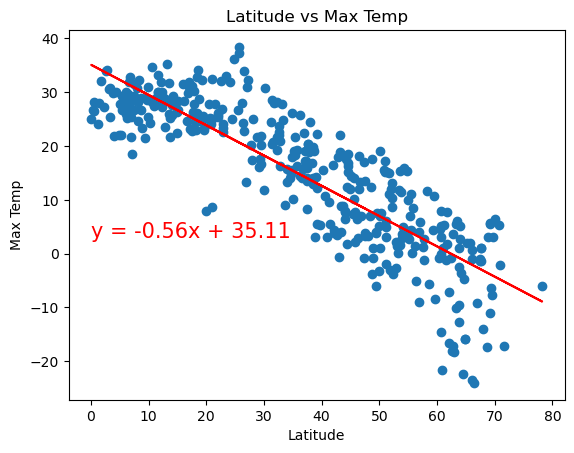

In [20]:
# Define x_values and y_values for Nortern Hemisphere
x_values_north_hemi = north_hemi_df['Lat']
y_values_north_hemi = north_hemi_df['Max Temp']


# Linear regression on Northern Hemisphere 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north_hemi, y_values_north_hemi)
regress_values_north_hemi = x_values_north_hemi * slope + intercept
print(regress_values_north_hemi)

# Create Plot
plt.scatter(x_values_north_hemi,y_values_north_hemi)
plt.plot(x_values_north_hemi,regress_values_north_hemi,"r-")

# Define the line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(0,3),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      27.255419
2      12.591757
3      21.248692
4      15.212507
5       8.661108
         ...    
554    13.731187
556    22.564718
557    27.429998
558    21.866857
563    20.775915
Name: Lat, Length: 175, dtype: float64
The r^2-value is: 0.48087600834183364


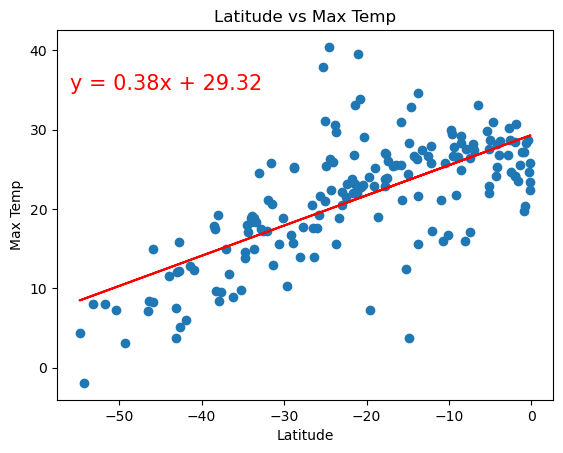

In [21]:
# Define x_values and y_values for Nortern Hemisphere
x_values_south_hemi = south_hemi_df['Lat']
y_values_south_hemi = south_hemi_df['Max Temp']

# Linear regression on Southern Hemisphere 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south_hemi, y_values_south_hemi)
regress_values_south_hemi = x_values_south_hemi * slope + intercept

print(regress_values_south_hemi)

# Create Plot
plt.scatter(x_values_south_hemi,y_values_south_hemi)
plt.plot(x_values_south_hemi,regress_values_south_hemi,"r-")

# Define the line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-56,35),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

In [22]:
filtered_south_hemi_df = south_hemi_df.dropna(subset=['Lat', 'Max Temp'])
filtered_south_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bandar lampung,-5.4254,105.2580,29.86,64,65,4.33,ID,1730110203
2,waitangi,-43.9535,-176.5597,11.57,95,0,2.68,NZ,1730109784
3,avarua,-21.2078,-159.7750,22.03,73,20,2.57,CK,1730109735
4,edinburgh of the seven seas,-37.0676,-12.3116,14.97,86,96,10.79,SH,1730109816
5,grytviken,-54.2811,-36.5092,-1.93,84,93,1.50,GS,1730109817
...,...,...,...,...,...,...,...,...,...
554,masterton,-40.9597,175.6575,12.28,86,42,2.23,NZ,1730110938
556,papao,-17.7500,-149.5500,23.82,82,70,8.11,PF,1730110942
557,micheweni,-4.9667,39.8333,28.63,63,44,3.18,TZ,1730110943


In [23]:
num_rows_lat = len(filtered_south_hemi_df['Lat'])
num_rows_lat

175

In [24]:
num_rows_max_temp = len(filtered_south_hemi_df['Max Temp'])
num_rows_max_temp

175

**Discussion about the linear relationship:The r^2-value is: 0.3852397530531541 for north hemisphere which indicates a weak positive linear relationship between the latiture and the maximume tempreture, while it shows a 
strong positive linear relationship for south hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

City_ID
1      74.915941
7      69.567716
8      79.506211
9      74.036654
10     75.315505
         ...    
560    81.365003
561    75.520119
562    62.792969
564    66.681645
565    63.137780
Name: Lat, Length: 391, dtype: float64
The r^2-value is: 0.06851415806825814


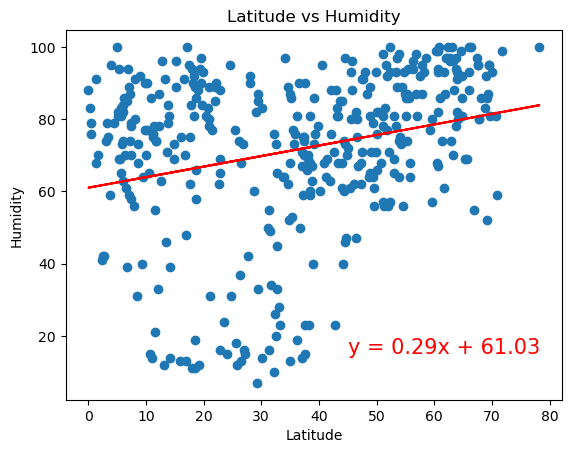

In [26]:
# Define x_values and y_values for Nortern Hemisphere
x_values_north_hemi = north_hemi_df['Lat']
y_values_north_hemi = north_hemi_df['Humidity']

# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north_hemi, y_values_north_hemi)
regress_values_north_hemi = x_values_north_hemi * slope + intercept
print(regress_values_north_hemi)

# Create Plot
plt.scatter(x_values_north_hemi,y_values_north_hemi)
plt.plot(x_values_north_hemi,regress_values_north_hemi,"r-")

# Define the line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      68.957457
2      65.726871
3      67.634101
4      66.304255
5      64.860901
         ...    
554    65.977902
556    67.924038
557    68.995919
558    67.770290
563    67.529942
Name: Lat, Length: 175, dtype: float64
The r^2-value is: 0.00278929027935226


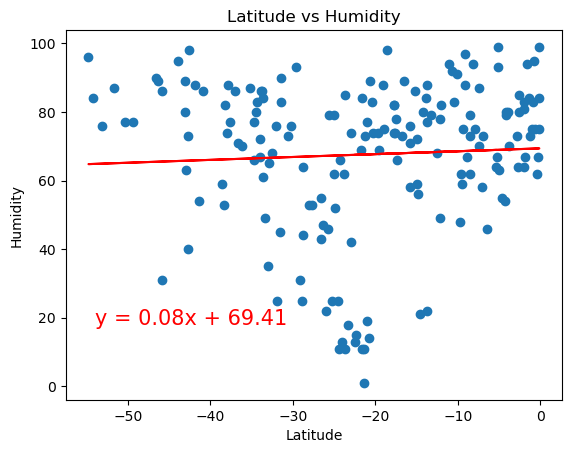

In [27]:
# Define x_values and y_values for Nortern Hemisphere
x_values_south_hemi = south_hemi_df['Lat']
y_values_south_hemi = south_hemi_df['Humidity']


# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south_hemi, y_values_south_hemi)
regress_values_south_hemi = x_values_south_hemi * slope + intercept
print(regress_values_south_hemi)

# Create Plot
plt.scatter(x_values_south_hemi,y_values_south_hemi)
plt.plot(x_values_south_hemi,regress_values_south_hemi,"r-")

# Define the line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-54,18),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship: There are no linear relationship between latitute and humidity for both south and north hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
1      63.878915
7      56.534571
8      70.182414
9      62.671453
10     64.427609
         ...    
560    72.734964
561    64.708592
562    47.231283
564    52.571330
565    47.704788
Name: Lat, Length: 391, dtype: float64
The r^2-value is: 0.04407618095490078


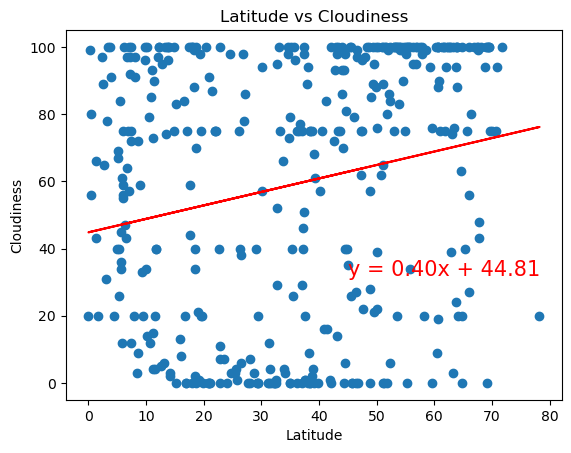

In [28]:
# Define x_values and y_values for Nortern Hemisphere
x_values_north_hemi = north_hemi_df['Lat']
y_values_north_hemi = north_hemi_df['Cloudiness']

# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north_hemi, y_values_north_hemi)
regress_values_north_hemi = x_values_north_hemi * slope + intercept
print(regress_values_north_hemi)

# Create Plot
plt.scatter(x_values_north_hemi,y_values_north_hemi)
plt.plot(x_values_north_hemi,regress_values_north_hemi,"r-")

# Define the line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,32),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      64.133463
2      42.370440
3      55.218600
4      46.260017
5      36.536781
         ...    
554    44.061521
556    57.171776
557    64.392564
558    56.136047
563    54.516929
Name: Lat, Length: 175, dtype: float64
The r^2-value is: 0.04283782608191041


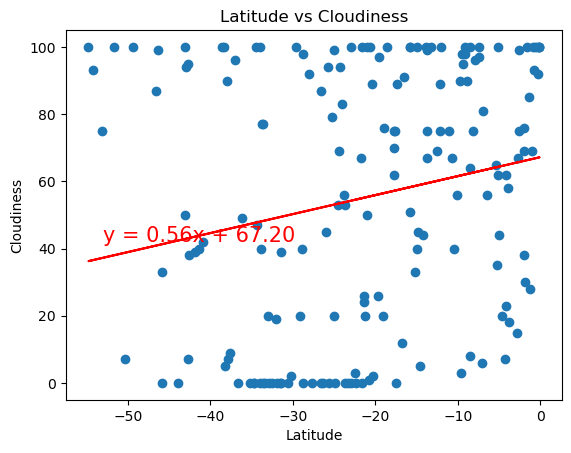

In [29]:
# Define x_values and y_values for Nortern Hemisphere
x_values_south_hemi = south_hemi_df['Lat']
y_values_south_hemi = south_hemi_df['Cloudiness']

# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south_hemi, y_values_south_hemi)
regress_values_south_hemi = x_values_south_hemi * slope + intercept
print(regress_values_south_hemi)

# Create Plot
plt.scatter(x_values_south_hemi,y_values_south_hemi)
plt.plot(x_values_south_hemi,regress_values_south_hemi,"r-")

# Define the line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-53,42),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:There are very week linear relationship between latitute and cloudiness for the south, while the north hemisphere indicates quite strong postive relationship.

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
1      3.680441
7      3.601654
8      3.748061
9      3.667488
10     3.686327
         ...   
560    3.775444
561    3.689341
562    3.501854
564    3.559139
565    3.506933
Name: Lat, Length: 391, dtype: float64
The r^2-value is: 0.0008980779395184194


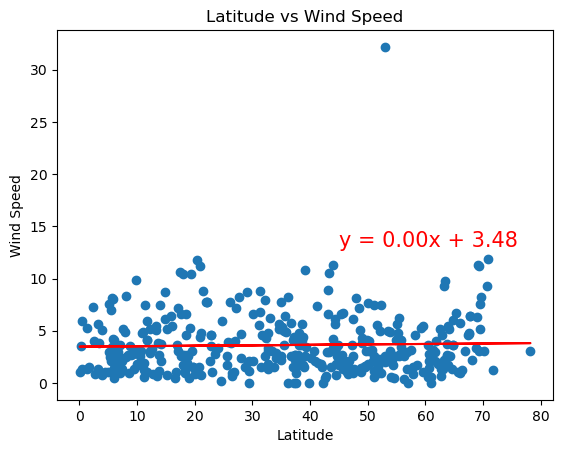

In [31]:
# Define x_values and y_values for Nortern Hemisphere
x_values_north_hemi = north_hemi_df['Lat']
y_values_north_hemi = north_hemi_df['Wind Speed']

# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north_hemi, y_values_north_hemi)
regress_values_north_hemi = x_values_north_hemi * slope + intercept
print(regress_values_north_hemi)

# Create Plot
plt.scatter(x_values_north_hemi,y_values_north_hemi)
plt.plot(x_values_north_hemi,regress_values_north_hemi ,"r-")

# Define the line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(45,13),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

City_ID
0      3.228262
2      4.939366
3      3.929188
4      4.633551
5      5.398034
         ...   
554    4.806406
556    3.775620
557    3.207890
558    3.857054
563    3.984356
Name: Lat, Length: 175, dtype: float64
The r^2-value is: 0.05435419006146161


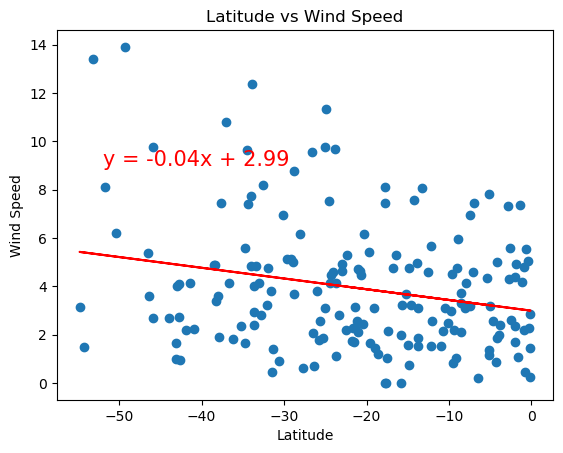

In [32]:
# Define x_values and y_values for Nortern Hemisphere
x_values_south_hemi = south_hemi_df['Lat']
y_values_south_hemi = south_hemi_df['Wind Speed']


# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south_hemi, y_values_south_hemi)
regress_values_south_hemi = x_values_south_hemi * slope + intercept
print(regress_values_south_hemi)

# Create Plot
plt.scatter(x_values_south_hemi,y_values_south_hemi)
plt.plot(x_values_south_hemi,regress_values_south_hemi,"r-")

# Define the line equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-52,9),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship: There are very week linear relationship between latitute and cloudiness for the south and north hemisphere. 